In [1]:
# Tabu search for TSP problem

import numpy as np
import pandas as pd
import scipy.spatial
import random
import csv
import time
import matplotlib.pyplot as pl

In [4]:
# Function definition

def dist_holes(shape,num_holes,num_centers,disp):
    x_c= np.random.uniform(low=disp,high=shape[0]-disp,size=num_centers)
    y_c= np.random.uniform(low=disp,high=shape[1]-disp,size=num_centers)
    
    x=np.empty([int(num_holes - (num_centers-1)*np.floor(num_holes/num_centers)),2])
    
    x_p= np.random.uniform(low=x_c[num_centers-1]-disp,high=x_c[num_centers-1]+disp,size=num_holes-(num_centers-1)*int(np.floor(num_holes/num_centers)))
    y_p= np.random.uniform(low=y_c[num_centers-1]-disp,high=y_c[num_centers-1]+disp,size=num_holes-(num_centers-1)*int(np.floor(num_holes/num_centers)))
    
    
    x[:,0]=x_p
    x[:,1]=y_p
    
    for i in range(0,num_centers-1):
        x_p=np.random.uniform(low=x_c[i]-disp,high=x_c[i]+disp,size=int(np.floor(num_holes/num_centers)))
        y_p=np.random.uniform(low=y_c[i]-disp,high=y_c[i]+disp,size=int(np.floor(num_holes/num_centers)))
        
        xtemp=np.concatenate(([x_p],[y_p]), axis=0)
        xtemp=np.transpose(xtemp)
        
        x=np.concatenate((x,xtemp),axis=0)
    
    
        
    dat=pd.DataFrame(x)
    temp=scipy.spatial.distance.pdist(dat)
    dis_mat=scipy.spatial.distance.squareform(temp)
    return dis_mat,dat
    
    
    
def random_start(num_holes):
    pro=np.random.permutation(np.array(range(0,num_holes))+1)
    x=np.append(pro,pro[0])
    x_temp=list(x)
    return x_temp
    
def TabuSearch_tsp(dis_mat,x,length_memory):
    start_time = time.time()
    f=0
    for i in range(0,len(x)-1):
        f=f+(dis_mat[x[i]-1,x[i+1]-1])
    memory=[]
    x_temp=x
    f_temp=f

    for u in range(0,length_memory):
        f_trash=9999
        for i in range(1, len(x)-2):
            for j in range(i+1, len(x)-1):
                x_new = x_temp[:i] + list(reversed(x_temp[i:j+1])) + x_temp[j+1:]
                f_new= f_temp - dis_mat[x_temp[i-1]-1,x_temp[i]-1] - dis_mat[x_temp[j]-1,x_temp[j+1]-1] + dis_mat[x_temp[i-1]-1,x_temp[j]-1] + dis_mat[x_temp[i]-1,x_temp[j+1]-1]
                if f_new<f_trash and x_new not in memory:
                    f_trash=f_new
                    f_temp1=f_new
                    x_temp1=x_new

        f_temp=f_temp1
        x_temp=x_temp1
        memory.append(x_temp)
        if f_temp<f:
            x=x_temp
            f=f_temp


    itera=0
    tot=0
    diversification_phase=0

    while itera<100 and tot<1000 and diversification_phase<5:
        f_trash=9999
        for i in range(1, len(x)-2):
            for j in range(i+1, len(x)-1):
                x_new = x_temp[:i] + list(reversed(x_temp[i:j+1])) + x_temp[j+1:]
                f_new= f_temp - dis_mat[x_temp[i-1]-1,x_temp[i]-1] - dis_mat[x_temp[j]-1,x_temp[j+1]-1] + dis_mat[x_temp[i-1]-1,x_temp[j]-1] + dis_mat[x_temp[i]-1,x_temp[j+1]-1]
                if f_new<f_trash and x_new not in memory:
                    f_trash=f_new
                    f_temp1=f_new
                    x_temp1=x_new
        itera=itera+1
        f_temp=f_temp1
        x_temp=x_temp1
        memory.append(x_temp)
        memory.pop(0)

        if f_temp<f:
            x=x_temp
            f=f_temp
            itera=0

        tot=tot+1

        if itera ==50:
            totn=0
            while totn<50:
                f_trash=9999
                for i in range(1, len(x)-4):
                    for j in range(i+1, len(x)-3):
                        for k in range(j+1,len(x)-2):
                            x_new = x_temp[:i] + list(reversed(x_temp[i:j+1])) +list(reversed(x_temp[j+1:k+2]))+ x_temp[k+2:]
                            f_new= f_temp - dis_mat[x_temp[i-1]-1,x_temp[i]-1] - dis_mat[x_temp[j]-1,x_temp[j+1]-1]- dis_mat[x_temp[k+1]-1,x_temp[k+2]-1] + dis_mat[x_temp[i-1]-1,x_temp[j]-1] + dis_mat[x_temp[i]-1,x_temp[k+1]-1] + dis_mat[x_temp[j+1]-1,x_temp[k+2]-1]
                            if f_new<f_trash and x_new not in memory:
                                f_trash=f_new
                                f_temp1=f_new
                                x_temp1=x_new
                f_temp=f_temp1
                x_temp=x_temp1
                memory.append(x_temp)
                memory.pop(0)
                if f_temp<f:
                    x=x_temp
                    f=f_temp
                    itera=0

                totn=totn+1
            itera=itera+1
            diversification_phase= diversification_phase + 1

    print(" Final solution: "+ str(x))
    print("\n Score function takes value: "+str(f))
    print("\n Number of iteratio without improvement: "+str(itera))
    print("\n Total number of iteration: "+str(tot+diversification_phase*50 ))
    print("\n Total number of diversification phases: "+str(diversification_phase))
    print("\n ---Tabu Search took %s seconds ---" % (time.time() - start_time))

    return {"Solution":x,"ScoreFunc":f,"TotIter":tot+diversification_phase*50,"DiverPhase":diversification_phase,"Time":(time.time() - start_time)}


In [9]:
#example of how dist_holes, TabuSearch_tsp and random_stard works
[dis_mat,dat]=dist_holes(shape=[100,20],num_holes=50,num_centers=4,disp=3)
b=TabuSearch_tsp(dis_mat= dis_mat,length_memory=5,x=random_start(num_holes=50))


 Final solution: [42, 46, 39, 45, 48, 8, 2, 44, 30, 33, 3, 1, 14, 37, 5, 38, 4, 28, 11, 9, 10, 20, 25, 17, 23, 16, 15, 21, 18, 19, 24, 22, 26, 34, 31, 12, 13, 35, 29, 27, 6, 7, 50, 32, 49, 36, 41, 43, 47, 40, 42]

 Score function takes value: 121.58551935877587

 Number of iteratio without improvement: 100

 Total number of iteration: 294

 Total number of diversification phases: 2

 ---Tabu Search took 14.336771249771118 seconds ---


In [67]:
# Test

# 5 holes

#generate an board with 5 holes and find the shortest path from 10 random starting points

[dis_mat,dat]=dist_holes(shape=[10,15],num_holes=5,num_centers=4,disp=3)
b=TabuSearch_tsp(dis_mat= dis_mat,length_memory=5,x=random_start(num_holes=5))
res_temp=pd.DataFrame(columns=["ScoreF", "TotIter","Time"])

for j in range(0,10):
    b=TabuSearch_tsp(dis_mat= dis_mat,length_memory=5,x=random_start(num_holes=5))
    
    res_temp=res_temp.append({"ScoreF":b["ScoreFunc"], "TotIter":b["TotIter"],"Time":b["Time"]},ignore_index=True)
    
    



 Final solution: [5, 4, 1, 2, 3, 5]

 Score function takes value: 23.55669597176196

 Number of iteratio without improvement: 100

 Total number of iteration: 149

 Total number of diversification phases: 1

 ---Tabu Search took 0.00499725341796875 seconds ---
 Final solution: [4, 5, 3, 2, 1, 4]

 Score function takes value: 23.556695971761958

 Number of iteratio without improvement: 100

 Total number of iteration: 149

 Total number of diversification phases: 1

 ---Tabu Search took 0.004998683929443359 seconds ---
 Final solution: [4, 1, 2, 3, 5, 4]

 Score function takes value: 23.556695971761954

 Number of iteratio without improvement: 100

 Total number of iteration: 149

 Total number of diversification phases: 1

 ---Tabu Search took 0.006993770599365234 seconds ---
 Final solution: [2, 1, 4, 5, 3, 2]

 Score function takes value: 23.556695971761954

 Number of iteratio without improvement: 100

 Total number of iteration: 149

 Total number of diversification phases: 1

 ---

In [68]:
final_res=pd.DataFrame(columns=["Metric","Mean", "Variance","Min","Max","OPL","Tabu/OPL"])
# Attach to the dataset the results

final_res=final_res.append({"Metric":"Score Function","Mean":np.mean(res_temp)[0], "Variance":np.var(res_temp)[0],"Min":np.min(res_temp)[0],"Max":np.max(res_temp)[0],"OPL":23.557, "Tabu/OPL":np.mean(res_temp)[0]/23.557},ignore_index=True)
final_res=final_res.append({"Metric":"Tot Iterations","Mean":np.mean(res_temp)[1], "Variance":np.var(res_temp)[1],"Min":np.min(res_temp)[1],"Max":np.max(res_temp)[1],"OPL":82, "Tabu/OPL":np.mean(res_temp)[1]/82},ignore_index=True)
final_res=final_res.append({"Metric":"Time","Mean":np.mean(res_temp)[2], "Variance":np.var(res_temp)[2],"Min":np.min(res_temp)[2],"Max":np.max(res_temp)[2],"OPL":0.37, "Tabu/OPL":np.mean(res_temp)[2]/0.37},ignore_index=True)



In [69]:
# 5 points
final_res

,Metric,Mean,Variance,Min,Max,OPL,Tabu/OPL
0,Score Function,23.556696,5.048710e-30,23.556696,23.556696,23.557,0.999987
1,Tot Iterations,158.900000,8.820900e+02,149.000000,248.000000,82.000,1.937805
2,Time,0.006293,2.610587e-06,0.004978,0.009994,0.370,0.017009


(0, 15)

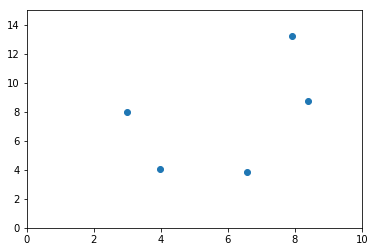

In [31]:
# plot the board
pl.scatter(dat.iloc[:,0],dat.iloc[:,1])
pl.xlim(0,10)
pl.ylim(0,15)

In [33]:
# 10 holes
#generate an board with 10 holes and find the shortest path from 10 random starting points

[dis_mat,dat]=dist_holes(shape=[10,20],num_holes=10,num_centers=4,disp=2)
b=TabuSearch_tsp(dis_mat= dis_mat,length_memory=8,x=random_start(num_holes=10))
res_temp=pd.DataFrame(columns=["ScoreF", "TotIter","Time"])
final_res=pd.DataFrame(columns=["Metric","Mean", "Variance","Min","Max","OPL","Tabu/OPL"])

for j in range(0,10):
    b=TabuSearch_tsp(dis_mat= dis_mat,length_memory=8,x=random_start(num_holes=10))
    
    res_temp=res_temp.append({"ScoreF":b["ScoreFunc"], "TotIter":b["TotIter"],"Time":b["Time"]},ignore_index=True)
  

 Final solution: [5, 6, 8, 7, 9, 4, 1, 2, 10, 3, 5]

 Score function takes value: 25.527736875467205

 Number of iteratio without improvement: 7

 Total number of iteration: 1050

 Total number of diversification phases: 1

 ---Tabu Search took 0.25785112380981445 seconds ---
 Final solution: [1, 2, 10, 3, 5, 6, 8, 7, 9, 4, 1]

 Score function takes value: 25.52773687546741

 Number of iteratio without improvement: 18

 Total number of iteration: 1000

 Total number of diversification phases: 0

 ---Tabu Search took 0.21686863899230957 seconds ---
 Final solution: [5, 6, 8, 7, 9, 4, 1, 2, 10, 3, 5]

 Score function takes value: 25.527736875467163

 Number of iteratio without improvement: 2

 Total number of iteration: 1000

 Total number of diversification phases: 0

 ---Tabu Search took 0.22187232971191406 seconds ---
 Final solution: [8, 6, 5, 3, 10, 2, 1, 4, 9, 7, 8]

 Score function takes value: 25.52773687546763

 Number of iteratio without improvement: 11

 Total number of iterat

In [37]:
final_res=pd.DataFrame(columns=["Metric","Mean", "Variance","Min","Max","OPL","Tabu/OPL"])
# Attach to the dataset the results

final_res=final_res.append({"Metric":"Score Function","Mean":np.mean(res_temp)[0], "Variance":np.var(res_temp)[0],"Min":np.min(res_temp)[0],"Max":np.max(res_temp)[0],"OPL":25.528, "Tabu/OPL":np.mean(res_temp)[0]/25.528},ignore_index=True)
final_res=final_res.append({"Metric":"Tot Iterations","Mean":np.mean(res_temp)[1], "Variance":np.var(res_temp)[1],"Min":np.min(res_temp)[1],"Max":np.max(res_temp)[1],"OPL":411, "Tabu/OPL":np.mean(res_temp)[1]/411},ignore_index=True)
final_res=final_res.append({"Metric":"Time","Mean":np.mean(res_temp)[2], "Variance":np.var(res_temp)[2],"Min":np.min(res_temp)[2],"Max":np.max(res_temp)[2],"OPL":0.75, "Tabu/OPL":np.mean(res_temp)[2]/0.75},ignore_index=True)


In [38]:
# 10 points
final_res

,Metric,Mean,Variance,Min,Max,OPL,Tabu/OPL
0,Score Function,25.527737,6.813865e-26,25.527737,25.527737,25.528,0.999990
1,Tot Iterations,781.200000,1.382564e+05,149.000000,1100.000000,411.000,1.900730
2,Time,0.214677,1.304089e-02,0.048972,0.464729,0.750,0.286236


(0, 20)

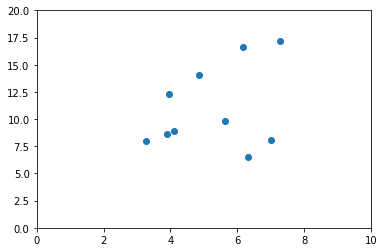

In [40]:
#plot the board
pl.scatter(dat.iloc[:,0],dat.iloc[:,1])
pl.xlim(0,10)
pl.ylim(0,20)

In [42]:
#20 points 
#generate an board with 20 holes and find the shortest path from 10 random starting points


[dis_mat,dat]=dist_holes(shape=[15,25],num_holes=20,num_centers=5,disp=2)
b=TabuSearch_tsp(dis_mat= dis_mat,length_memory=10,x=random_start(num_holes=20))
res_temp=pd.DataFrame(columns=["ScoreF", "TotIter","Time"])
final_res=pd.DataFrame(columns=["Metric","Mean", "Variance","Min","Max","OPL","Tabu/OPL"])

for j in range(0,10):
    b=TabuSearch_tsp(dis_mat= dis_mat,length_memory=10,x=random_start(num_holes=20))
    
    res_temp=res_temp.append({"ScoreF":b["ScoreFunc"], "TotIter":b["TotIter"],"Time":b["Time"]},ignore_index=True)
  

 Final solution: [11, 8, 7, 5, 6, 3, 4, 1, 2, 9, 12, 10, 18, 19, 20, 15, 13, 14, 16, 17, 11]

 Score function takes value: 39.55819141874727

 Number of iteratio without improvement: 100

 Total number of iteration: 207

 Total number of diversification phases: 1

 ---Tabu Search took 0.5486831665039062 seconds ---
 Final solution: [7, 5, 6, 3, 4, 1, 2, 9, 12, 10, 18, 19, 13, 14, 16, 15, 20, 17, 11, 8, 7]

 Score function takes value: 40.09208614405808

 Number of iteratio without improvement: 100

 Total number of iteration: 254

 Total number of diversification phases: 2

 ---Tabu Search took 0.9034862518310547 seconds ---
 Final solution: [19, 18, 10, 12, 9, 2, 1, 4, 3, 6, 5, 7, 8, 11, 17, 16, 14, 13, 15, 20, 19]

 Score function takes value: 39.55819141874705

 Number of iteratio without improvement: 51

 Total number of iteration: 642

 Total number of diversification phases: 5

 ---Tabu Search took 2.2976796627044678 seconds ---
 Final solution: [12, 10, 18, 19, 20, 15, 13, 14, 1

In [45]:
final_res=pd.DataFrame(columns=["Metric","Mean", "Variance","Min","Max","OPL","Tabu/OPL"])
# Attach to the dataset the results

final_res=final_res.append({"Metric":"Score Function","Mean":np.mean(res_temp)[0], "Variance":np.var(res_temp)[0],"Min":np.min(res_temp)[0],"Max":np.max(res_temp)[0],"OPL":39.558, "Tabu/OPL":np.mean(res_temp)[0]/39.558},ignore_index=True)
final_res=final_res.append({"Metric":"Tot Iterations","Mean":np.mean(res_temp)[1], "Variance":np.var(res_temp)[1],"Min":np.min(res_temp)[1],"Max":np.max(res_temp)[1],"OPL":1034, "Tabu/OPL":np.mean(res_temp)[1]/1034},ignore_index=True)
final_res=final_res.append({"Metric":"Time","Mean":np.mean(res_temp)[2], "Variance":np.var(res_temp)[2],"Min":np.min(res_temp)[2],"Max":np.max(res_temp)[2],"OPL":1.69, "Tabu/OPL":np.mean(res_temp)[2]/1.69},ignore_index=True)


In [46]:
# 20 points
final_res

,Metric,Mean,Variance,Min,Max,OPL,Tabu/OPL
0,Score Function,39.911056,0.538075,39.558191,42.019043,39.558,1.008925
1,Tot Iterations,415.600000,80548.040000,152.000000,1000.000000,1034.000,0.401934
2,Time,1.180122,0.559303,0.484739,2.312671,1.690,0.698297


In [71]:
# average error committed using heuristic insead of exact solver
1-1/1.008925

0.008846049012562918

(0, 25)

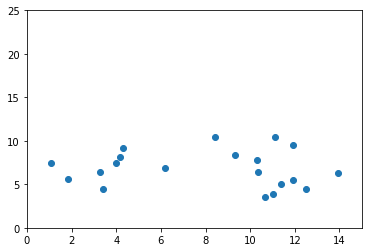

In [47]:
pl.scatter(dat.iloc[:,0],dat.iloc[:,1])
pl.xlim(0,15)
pl.ylim(0,25)

In [48]:
#40 points 

#generate an board with 40 holes and find the shortest path from 10 random starting points


[dis_mat,dat]=dist_holes(shape=[20,30],num_holes=40,num_centers=5,disp=2)
b=TabuSearch_tsp(dis_mat= dis_mat,length_memory=10,x=random_start(num_holes=40))
res_temp=pd.DataFrame(columns=["ScoreF", "TotIter","Time"])
final_res=pd.DataFrame(columns=["Metric","Mean", "Variance","Min","Max","OPL","Tabu/OPL"])

for j in range(0,10):
    b=TabuSearch_tsp(dis_mat= dis_mat,length_memory=10,x=random_start(num_holes=40))
    
    res_temp=res_temp.append({"ScoreF":b["ScoreFunc"], "TotIter":b["TotIter"],"Time":b["Time"]},ignore_index=True)
  

 Final solution: [24, 21, 40, 35, 36, 37, 39, 2, 7, 3, 6, 1, 4, 8, 5, 13, 16, 28, 30, 25, 31, 27, 26, 32, 29, 9, 12, 15, 11, 10, 14, 38, 34, 17, 19, 20, 33, 22, 23, 18, 24]

 Score function takes value: 68.01008249926701

 Number of iteratio without improvement: 100

 Total number of iteration: 393

 Total number of diversification phases: 3

 ---Tabu Search took 12.401881217956543 seconds ---
 Final solution: [18, 24, 21, 35, 36, 37, 39, 2, 7, 3, 6, 1, 4, 8, 5, 13, 16, 28, 30, 25, 31, 27, 26, 32, 29, 9, 12, 15, 11, 10, 14, 38, 20, 19, 34, 17, 40, 33, 22, 23, 18]

 Score function takes value: 69.75142833933397

 Number of iteratio without improvement: 100

 Total number of iteration: 179

 Total number of diversification phases: 1

 ---Tabu Search took 4.381701231002808 seconds ---
 Final solution: [14, 38, 34, 17, 19, 20, 33, 22, 23, 18, 24, 21, 40, 35, 36, 37, 39, 2, 7, 3, 6, 1, 4, 8, 5, 13, 16, 28, 30, 25, 31, 27, 26, 32, 29, 9, 12, 15, 11, 10, 14]

 Score function takes value: 68.0

In [52]:
final_res=pd.DataFrame(columns=["Metric","Mean", "Variance","Min","Max","OPL","Tabu/OPL"])
# Attach to the dataset the results

final_res=final_res.append({"Metric":"Score Function","Mean":np.mean(res_temp)[0], "Variance":np.var(res_temp)[0],"Min":np.min(res_temp)[0],"Max":np.max(res_temp)[0],"OPL":68.01, "Tabu/OPL":np.mean(res_temp)[0]/68.01},ignore_index=True)
final_res=final_res.append({"Metric":"Tot Iterations","Mean":np.mean(res_temp)[1], "Variance":np.var(res_temp)[1],"Min":np.min(res_temp)[1],"Max":np.max(res_temp)[1],"OPL":448439, "Tabu/OPL":np.mean(res_temp)[1]/448439},ignore_index=True)
final_res=final_res.append({"Metric":"Time","Mean":np.mean(res_temp)[2], "Variance":np.var(res_temp)[2],"Min":np.min(res_temp)[2],"Max":np.max(res_temp)[2],"OPL":47.31, "Tabu/OPL":np.mean(res_temp)[2]/47.31},ignore_index=True)


In [53]:
# 40 points
final_res

,Metric,Mean,Variance,Min,Max,OPL,Tabu/OPL
0,Score Function,68.525362,0.790623,68.010082,70.640491,68.01,1.007578
1,Tot Iterations,345.800000,52930.760000,175.000000,1000.000000,448439.00,0.000771
2,Time,7.680115,9.583521,4.367494,13.188429,47.31,0.162336


(0, 30)

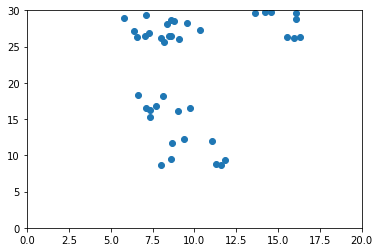

In [49]:
# plot the board
pl.scatter(dat.iloc[:,0],dat.iloc[:,1])
pl.xlim(0,20)
pl.ylim(0,30)

In [54]:
#80 points 

#generate an board with 80 holes and find the shortest path from 10 random starting points

[dis_mat,dat]=dist_holes(shape=[20,40],num_holes=80,num_centers=5,disp=2)
b=TabuSearch_tsp(dis_mat= dis_mat,length_memory=10,x=random_start(num_holes=80))
res_temp=pd.DataFrame(columns=["ScoreF", "TotIter","Time"])
final_res=pd.DataFrame(columns=["Metric","Mean", "Variance","Min","Max","OPL","Tabu/OPL"])

for j in range(0,10):
    b=TabuSearch_tsp(dis_mat= dis_mat,length_memory=10,x=random_start(num_holes=80))
    
    res_temp=res_temp.append({"ScoreF":b["ScoreFunc"], "TotIter":b["TotIter"],"Time":b["Time"]},ignore_index=True)
  

 Final solution: [58, 63, 64, 62, 40, 43, 34, 44, 37, 33, 47, 38, 41, 48, 35, 36, 42, 45, 46, 39, 52, 49, 8, 9, 7, 2, 3, 76, 80, 74, 79, 78, 75, 71, 69, 66, 70, 67, 77, 73, 68, 72, 65, 24, 27, 25, 23, 20, 22, 31, 32, 21, 18, 29, 17, 30, 19, 26, 28, 16, 1, 11, 5, 4, 13, 12, 10, 6, 14, 15, 61, 59, 53, 50, 54, 51, 60, 56, 55, 57, 58]

 Score function takes value: 106.13831221923529

 Number of iteratio without improvement: 100

 Total number of iteration: 226

 Total number of diversification phases: 1

 ---Tabu Search took 40.34784269332886 seconds ---
 Final solution: [51, 60, 56, 54, 50, 55, 57, 53, 59, 58, 63, 64, 62, 52, 45, 42, 40, 43, 34, 44, 36, 35, 39, 46, 38, 41, 48, 37, 33, 47, 76, 80, 74, 79, 70, 67, 77, 73, 72, 65, 68, 66, 69, 78, 71, 75, 24, 27, 25, 23, 20, 22, 31, 32, 21, 18, 29, 17, 30, 19, 26, 28, 16, 3, 7, 9, 8, 2, 6, 1, 11, 5, 4, 13, 12, 10, 14, 15, 49, 61, 51]

 Score function takes value: 103.48871464377274

 Number of iteratio without improvement: 1

 Total number of

In [60]:
final_res=pd.DataFrame(columns=["Metric","Mean", "Variance","Min","Max","OPL","Tabu/OPL"])
# Attach to the dataset the results
final_res=final_res.append({"Metric":"Score Function","Mean":np.mean(res_temp)[0], "Variance":np.var(res_temp)[0],"Min":np.min(res_temp)[0],"Max":np.max(res_temp)[0],"OPL":100.56, "Tabu/OPL":np.mean(res_temp)[0]/100.56},ignore_index=True)
final_res=final_res.append({"Metric":"Tot Iterations","Mean":np.mean(res_temp)[1], "Variance":np.var(res_temp)[1],"Min":np.min(res_temp)[1],"Max":np.max(res_temp)[1],"OPL":3121627, "Tabu/OPL":np.mean(res_temp)[1]/3121627},ignore_index=True)
final_res=final_res.append({"Metric":"Time","Mean":np.mean(res_temp)[2], "Variance":np.var(res_temp)[2],"Min":np.min(res_temp)[2],"Max":np.max(res_temp)[2],"OPL":450.15, "Tabu/OPL":np.mean(res_temp)[2]/450.15},ignore_index=True)


In [61]:
# 80 points
final_res

,Metric,Mean,Variance,Min,Max,OPL,Tabu/OPL
0,Score Function,103.824973,1.201043,102.156752,105.341333,100.56,1.032468
1,Tot Iterations,357.700000,8003.410000,228.000000,585.000000,3121627.00,0.000115
2,Time,91.315150,1582.227582,40.935524,199.051294,450.15,0.202855


(0, 40)

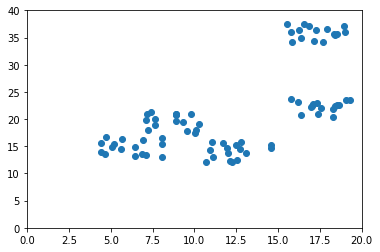

In [63]:
pl.scatter(dat.iloc[:,0],dat.iloc[:,1])
pl.xlim(0,20)
pl.ylim(0,40)

In [56]:
# Write the csv files of the considered board problem
np.set_printoptions(threshold=np.nan)

ap=pd.DataFrame(dis_mat)
ap.to_csv("eighty_nodes.csv")
ap
aap=pd.DataFrame(dat)
aap.to_csv("eighty_nodes_pos.csv")
aap

,0,1
0,8.919814,20.793151
1,9.309046,19.492066
2,10.287405,19.086432
3,7.383951,21.271639
4,8.876917,20.927202
5,8.926107,19.611311
6,10.078788,18.052577
7,9.581956,17.806239
8,10.029438,17.468176
9,7.662943,19.963980


In [55]:
#visualize the instance in a suitable way to copy and paste on OPL
np.set_printoptions(threshold=np.nan)
dis_mat

array([[ 0.        ,  1.35805865,  2.18705122,  1.60867234,  0.14074739,
         1.18185636,  2.97556088,  3.05942345,  3.5052422 ,  1.50573864,
         0.10036491,  2.01641936,  1.74208559,  2.29244805,  3.31890366,
         0.88220285, 17.97886675, 18.1450547 , 16.75263528, 17.7081298 ,
        17.62979609, 18.22529735, 17.60872789, 15.80222382, 17.42806572,
        15.91262639, 16.05104266, 15.04537128, 18.2769804 , 17.18230656,
        19.14598076, 18.14411537,  8.38548645,  9.23718956,  6.77297253,
         7.60726944,  8.16851093,  6.30028819,  5.50104807,  8.86082387,
         6.64346442,  8.06187148,  9.04832614,  9.14298048,  6.76851959,
         5.96043068,  7.9430974 ,  7.34440322,  4.32776662,  7.13557262,
         5.44908826,  5.46606474,  7.17402996,  6.49725931,  8.23796427,
         6.87787679,  8.35939467,  7.93770501,  6.40108044,  5.82908953,
         5.05255665,  7.81220133,  7.47773988,  7.54714296,  7.45602542,
         9.61616093,  8.21363564,  8.649587  ,  9.7

In [ ]:
# How to eventually inport the csv files on the instances in order to run again the tests
dat=pd.read_csv("fourty_nodes_pos.csv",header=0)
dat=dat.iloc[:,1:]
temp=scipy.spatial.distance.pdist(dat)
dis_mat=scipy.spatial.distance.squareform(temp)
dis_mat